Practical Task :
*  Create a copy of the MNIST.ipynb file and rename it mnist_task.ipynb.
*  Load the MNIST dataset. Use a library such as scikit-learn to access the
dataset (from sklearn.datasets import load_digits).
*  Split the data into train and test sets.
 Add a comment explaining the purpose of the train and test sets.
*  Use the RandomForestClassifier built into scikit-learn to create a
classification model.
*  Pick one parameter to tune, and explain why you chose this parameter.
*  Select a value for the parameter to use during testing on the test data, and
provide a rationale for your choice.
*  Print the confusion matrix for your Random Forest model on the test set.
*  Report which classes the model struggles with the most.
*  Report the accuracy, precision, recall, and f1-score. Hint: use
average=”macro” in precision_score, recall_score and f1_score from
scikit-learn.

In [189]:
import numpy as np
import seaborn as sns
import pandas as pd
# Import relevant libraries.

from sklearn.datasets import load_digits
# Import data from sklearn


import matplotlib.pyplot as plt
# Import pyplot for plots.


from sklearn.ensemble import RandomForestClassifier
# Import RandomForest Classifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from skimage import exposure

# Import Hyperparameter tuning tools and other relevant tools.

In [190]:
digits = load_digits()
X, y = digits.data, digits.target
# Load the dataset. Assigned data to X and target to y.


In [191]:
print("Image Data Shape" , X.shape)
# Print to show there are 1797 images (8 x 8 images for a dimensionality of 64)

print("Label Data Shape", y.shape)
# Print to show there are 1797 labels (integers from 0-9)


Image Data Shape (1797, 64)
Label Data Shape (1797,)


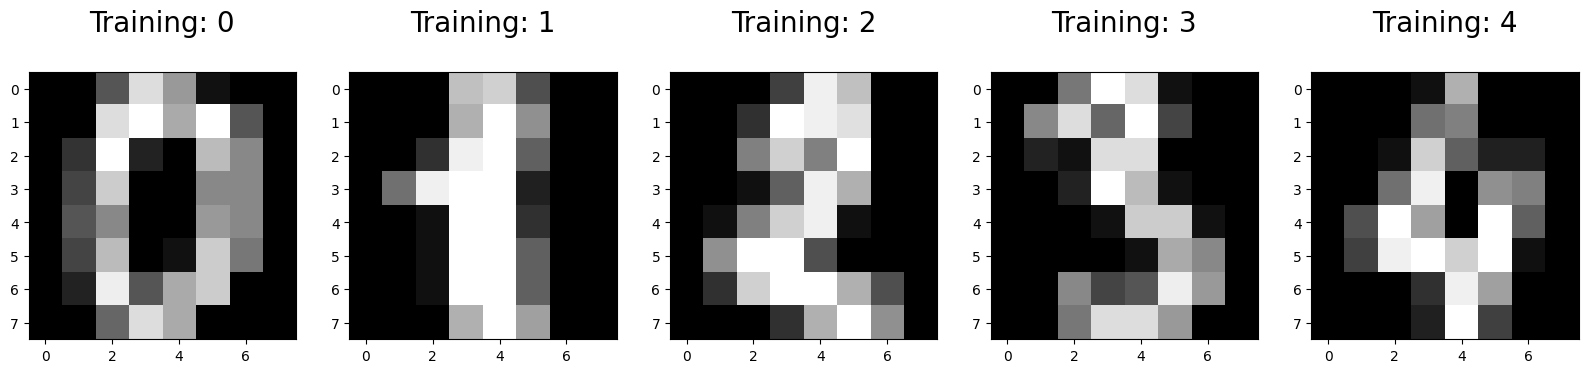

In [192]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
   plt.subplot(1, 5, index + 1)
   plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
   plt.title('Training: %i\n' % label, fontsize = 20)
# Reshape the image and plot to show training images.


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into train(80%) and test set (20%).

Split data into training and test sets. In order for our model to function properly in the actual world when it is exposed to new images that have not previously been seen, it is crucial to keep the test set and the train set entirely distinct. After training, the model is exposed to a large number of picture instances. Specifically, aim is to ensure that the model has learned from training and is able to generalise its knowledge, instead of only recalling the same images it has seen repeatedly during training on the training set.

In [194]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Create Random forest classifier and fit the model.


RandomForestClassifier()

In [195]:
y_pred = rf.predict(X_test)
# Predict on the test set.

In [196]:
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score: ', recall_score(y_test, y_pred, average='weighted'))
print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))
# Evaluate the classifier's performance.

Accuracy score: 0.975
Precision score :  0.9756983830084134
Recall score:  0.975
F1 score:  0.9750358352075584


In [197]:
p_grid = {
    #'n_estimators': [300,320, 340],
    #'max_depth' : [None, 10,20],
    #'min_samples_split': [2,5,10]
    # Checked different parameters above and compared.

    'max_features': [8,10,12]
}

tuned = GridSearchCV(estimator = rf,
                    param_grid= p_grid,
                    cv=15)

# Completed Hyperparameter tuning using GridSearchCV

Picked the parameter max_features, this is the best feature to consider as it takes random subsets of features and looks for best split for test and training data set.

In [198]:

tuned.fit(X_train,y_train)
# Fit the model.

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'max_features': [8, 10, 12]})

In [199]:
rf_best = tuned.best_estimator_
rf_best.fit(X_train, y_train)
# Fit the model after checking with best estimator function.

RandomForestClassifier(max_features=8)

Chosen 8 value for max_features parameter to get the best result. A good practice to consider a default value of max_feature parameter is set to be a square root of the number of features present in the dataset. And, ideal number of max_features generally tend to lie close to this value. Checked few values, also features size is 64...and 8 was the value alongside cv parameter model predicted the best score after this model started to decrease the score.

In [200]:
y_pred_best = rf_best.predict(X_test)
# Prediction for best classification

In [201]:
print('Accuracy score:',accuracy_score(y_test, y_pred_best))
print('Precision score : ', precision_score(y_test, y_pred_best, average='weighted'))
print('Recall score: ', recall_score(y_test, y_pred_best, average='weighted'))
print('F1 score: ', f1_score(y_test, y_pred_best, average='weighted'))

# Performance report of tuned model in comparison to model without parameters.

Accuracy score: 0.975
Precision score :  0.975723037753113
Recall score:  0.975
F1 score:  0.9750129473868117


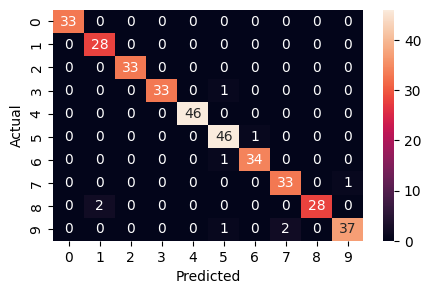

In [202]:
confusion = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,3))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix to show how the model performed after parameter tuning.

Looking at the above confusion matrix, we can say the model struggles with classes 1 and 8 in the model.

In [203]:
print('Accuracy_best:',accuracy_score(y_test, y_pred_best))
print('Precision_best: ', precision_score(y_test, y_pred_best, average='macro'))
print('Recall best: ', recall_score(y_test, y_pred_best, average='macro'))
print('F1_best: ', f1_score(y_test, y_pred_best, average='macro'))

# Evaluate the best performance matrix.

Accuracy_best: 0.975
Precision_best:  0.9760078768349445
Recall best:  0.9749661779605459
F1_best:  0.975111070223458


* We can observe that model's overall accuracy and F1 score improves with macro average than weighted.
* Prediction and classification by using a tuned model with macro will perform better.